# MNIST Handwritten Numbers 
### Author: Bryce Freshcorn

#### Keras Demonstration for MITRE Corp. Training

In [1]:
%matplotlib inline
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Data Preprocessing
### Step 1 - Load the data
[`keras.datasets`](https://keras.io/datasets/) module contains commonly used datasets for benchmarking neural network models. In this tutorial, we will be using the MNIST handwritten digits data.

First, we need to load* the data...

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

\* As you can see, the data set is actually downloaded from an S3 bucket.

### Step 2 - Examine the data
Now, let us get a better idea of what the MNIST data is like...

In [3]:
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
print('Training images matrix shape: {}'.format(x_train.shape))
print('Training labels vector shape: {}\n'.format(y_train.shape))
print('Testing images matrix shape: {}'.format(x_test.shape))
print('Testing labels vector shape: {}'.format(y_test.shape))

Training images matrix shape: (60000, 28, 28)
Training labels vector shape: (60000,)

Testing images matrix shape: (10000, 28, 28)
Testing labels vector shape: (10000,)


So what is shape telling us here?  The first item in the tuple is the number of training or testing (as defined) samples in the matrix or vector. 
We see that there are 60,000 images in the training set and 10,000 images in the test set.

For the purposes of training our model and evaluating its performance, we want to make sure that the number of samples in `x_train` is the same as the number in `y_train`. Otherwise, it would indicate a fundamental labeling problem with our training data.  We also want to ensure this is true for the testing data as well, since we need that particular data sample to evaluate our model's performance.

You should have noticed that the `y_train` and `y_test` data sets only contain one element. This tells us that these are vectors. This makes sense since these are simply labels corresponding to their samples.

The last two elements in `x_train` and `y_train` tell us that the images in the MNIST data are 28x28 pixels.

Now, let us take a look at what these small images actually look like...

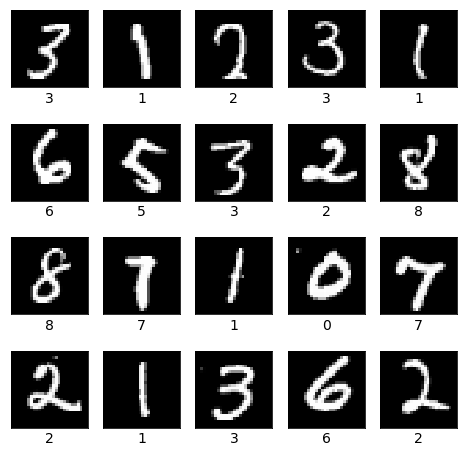

In [4]:
rand_index = randint(0, 60000, size=20)
plt.figure(figsize=(8,8))
for i, index in enumerate(rand_index, 1):
    plt.subplot(4, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off',
                    labelbottom='off', left='off', labelleft='off')
    plt.xlabel(y_train[index], color='black', fontsize=14)
    plt.imshow(x_train[index], cmap='gray')

### Step 3 - Transform data values

In [5]:
scaled_x_train = x_train/255.
scaled_x_test = x_test/255.
hot_y_train = to_categorical(y_train)
hot_y_test = to_categorical(y_test)

### Helper functions

In [6]:
def evaluate_score(model, x, y):
    model_score = model.evaluate(x, y, verbose=1)
    print('\nCategorical Cross-entropy Loss: {}'.format(model_score[0]))
    print('Test Set Accuracy: {}\n\n'.format(model_score[1]))

In [7]:
def show_incorrect_predictions(model, x, y, orig_x):
    real_labels = y.reshape((-1,))
    pred_labels = model.predict_classes(x, batch_size=256, verbose=1)
    label_outputs = list(zip(pred_labels, real_labels))
    incorrect_indices = [i for i, label in enumerate(label_outputs) if label[0] != label[1]]
    
    plt.figure(figsize=(8,8))
    for i, index in enumerate(incorrect_indices, 1):
        if i > 16:
            break
        plt.subplot(4, 4, i)
        plt.tick_params(axis='both', which='both', bottom='off',
                        labelbottom='off', left='off', labelleft='off')
        plt.xlabel('Pred: {}, Real: {}'.format(pred_labels[index], real_labels[index]),
                   color='black', fontsize=14)
        plt.imshow(orig_x[index], cmap='gray')

## Vanilla Neural Network Implementation

In [8]:
vanilla_model = Sequential()
vanilla_model.add(Dense(784, activation='relu', input_shape=(28*28,), name='Input'))
vanilla_model.add(Dense(256, activation='relu', name='Hidden_1'))
vanilla_model.add(Dense(128, activation='relu', name='Hidden_2'))
vanilla_model.add(Dense(10, activation='softmax', name='Output'))
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 784)               615440    
_________________________________________________________________
Hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               32896     
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 850,586
Trainable params: 850,586
Non-trainable params: 0
_________________________________________________________________


In [9]:
vanilla_model.compile(optimizer='sgd',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Transform input MNIST images into vector representations

In [10]:
scaled_x_train_vector = scaled_x_train.reshape(num_train_samples, 28*28)
scaled_x_test_vector = scaled_x_test.reshape(num_test_samples, 28*28)

In [11]:
vanilla_model.fit(scaled_x_train_vector, hot_y_train, batch_size=256, epochs=10,
                  verbose=1, validation_data=(scaled_x_test_vector, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 1.5689 - acc: 0.6280 - val_loss: 0.8675 - val_acc: 0.8193
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.6502 - acc: 0.8473 - val_loss: 0.4858 - val_acc: 0.8799
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4438 - acc: 0.8835 - val_loss: 0.3823 - val_acc: 0.8979
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3692 - acc: 0.8990 - val_loss: 0.3324 - val_acc: 0.9073
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.3295 - acc: 0.9075 - val_loss: 0.3038 - val_acc: 0.9145
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.3036 - acc: 0.9145 - val_loss: 0.2818 - val_acc: 0.9215
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2841 - acc: 0.9196 - val_loss: 0.2660 - val_acc

10000/10000 [==============================] - 0s 39us/step

Categorical Cross-entropy Loss: 0.23320016617178918
Test Set Accuracy: 0.9342


10000/10000 [==============================] - 0s 7us/step


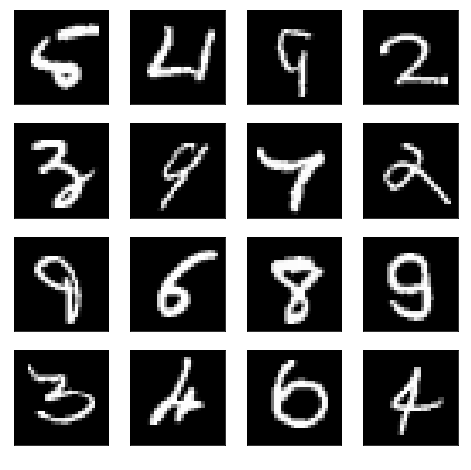

In [12]:
evaluate_score(vanilla_model, scaled_x_test_vector, hot_y_test)
show_incorrect_predictions(vanilla_model, scaled_x_test_vector, y_test, x_test)

In [13]:
vanilla_history = vanilla_model.fit(scaled_x_train_vector, hot_y_train, batch_size=256, epochs=40,
                                    verbose=1, validation_data=(scaled_x_test_vector, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 24us/step - loss: 0.2330 - acc: 0.9348 - val_loss: 0.2247 - val_acc: 0.9372
Epoch 2/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.2234 - acc: 0.9377 - val_loss: 0.2170 - val_acc: 0.9385
Epoch 3/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.2151 - acc: 0.9397 - val_loss: 0.2112 - val_acc: 0.9415
Epoch 4/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.2070 - acc: 0.9422 - val_loss: 0.2025 - val_acc: 0.9427
Epoch 5/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.1996 - acc: 0.9443 - val_loss: 0.1977 - val_acc: 0.9427
Epoch 6/40
60000/60000 [==============================] - 1s 17us/step - loss: 0.1927 - acc: 0.9459 - val_loss: 0.1915 - val_acc: 0.9462
Epoch 7/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.1862 - acc: 0.9476 - val_loss: 0.1857 - val_acc

10000/10000 [==============================] - 0s 36us/step

Categorical Cross-entropy Loss: 0.10056333648897707
Test Set Accuracy: 0.9693


10000/10000 [==============================] - 0s 6us/step


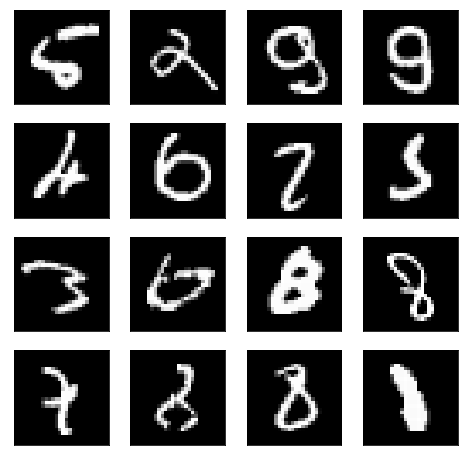

In [14]:
evaluate_score(vanilla_model, scaled_x_test_vector, hot_y_test)
show_incorrect_predictions(vanilla_model, scaled_x_test_vector, y_test, x_test)

## Convolutional Neural Network Implementation

In [15]:
cnn_scaled_x_train = scaled_x_train.reshape(num_train_samples, 28, 28, 1)
cnn_scaled_x_test = scaled_x_test.reshape(num_test_samples, 28, 28, 1)

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, kernel_size=4, activation='relu', padding='same',
                     input_shape=(28,28,1), name='Layer_1_1'))
cnn_model.add(MaxPooling2D(pool_size=2, name='Layer_1_2'))
cnn_model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same',
              name='Layer_2_1'))
cnn_model.add(MaxPooling2D(pool_size=2, name='Layer_2_2'))
cnn_model.add(Flatten(name='Flatten'))
cnn_model.add(Dense(32, activation='relu', name='Layer_3'))
cnn_model.add(Dense(10, activation='softmax', name='Prediction'))
cnn_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1_1 (Conv2D)           (None, 28, 28, 128)       2176      
_________________________________________________________________
Layer_1_2 (MaxPooling2D)     (None, 14, 14, 128)       0         
_________________________________________________________________
Layer_2_1 (Conv2D)           (None, 14, 14, 64)        131136    
_________________________________________________________________
Layer_2_2 (MaxPooling2D)     (None, 7, 7, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Layer_3 (Dense)              (None, 32)                100384    
_________________________________________________________________
Pre

In [17]:
cnn_model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
cnn_model.fit(cnn_scaled_x_train, hot_y_train, batch_size=256, epochs=10,
              verbose=1, validation_data=(cnn_scaled_x_test, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.0259 - acc: 0.3974 - val_loss: 1.1458 - val_acc: 0.7220
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.6120 - acc: 0.8260 - val_loss: 0.3754 - val_acc: 0.8924
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3495 - acc: 0.8952 - val_loss: 0.2933 - val_acc: 0.9136
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2821 - acc: 0.9155 - val_loss: 0.2460 - val_acc: 0.9262
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2453 - acc: 0.9260 - val_loss: 0.2100 - val_acc: 0.9384
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2143 - acc: 0.9355 - val_loss: 0.2190 - val_acc: 0.9329
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1931 - acc: 0.9423 - val_loss: 0.1792 - 

10000/10000 [==============================] - 1s 93us/step

Categorical Cross-entropy Loss: 0.14571035523861647
Test Set Accuracy: 0.9556


10000/10000 [==============================] - 0s 41us/step


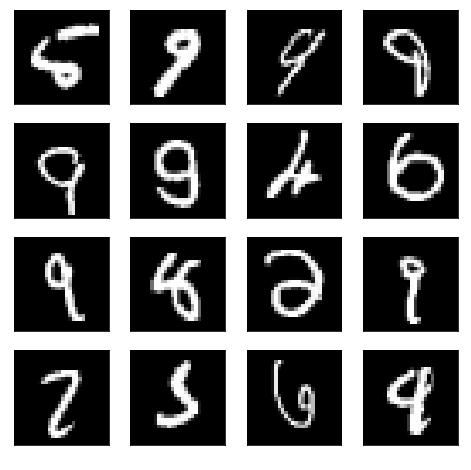

In [19]:
evaluate_score(cnn_model, cnn_scaled_x_test, hot_y_test)
show_incorrect_predictions(cnn_model, cnn_scaled_x_test, y_test, x_test)

In [20]:
cnn_history = cnn_model.fit(cnn_scaled_x_train, hot_y_train, batch_size=256, epochs=40,
                            verbose=1, validation_data=(cnn_scaled_x_test, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.1360 - acc: 0.9603 - val_loss: 0.1238 - val_acc: 0.9630
Epoch 2/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.1257 - acc: 0.9633 - val_loss: 0.1246 - val_acc: 0.9624
Epoch 3/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.1191 - acc: 0.9647 - val_loss: 0.1338 - val_acc: 0.9597
Epoch 4/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.1112 - acc: 0.9668 - val_loss: 0.1009 - val_acc: 0.9696
Epoch 5/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.1053 - acc: 0.9688 - val_loss: 0.1227 - val_acc: 0.9596
Epoch 6/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.1000 - acc: 0.9705 - val_loss: 0.1074 - val_acc: 0.9665
Epoch 7/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.0956 - acc: 0.9713 - val_loss: 0.0946 - 

10000/10000 [==============================] - 1s 87us/step

Categorical Cross-entropy Loss: 0.04616535491407849
Test Set Accuracy: 0.9847


10000/10000 [==============================] - 0s 40us/step


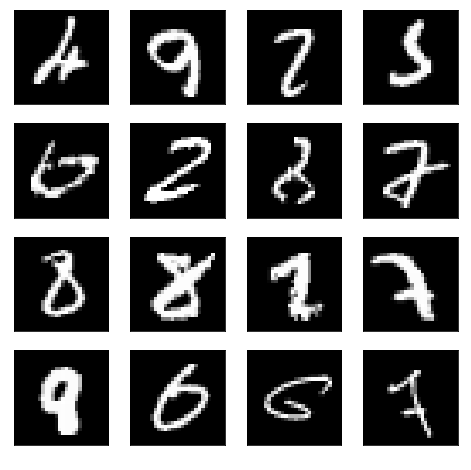

In [21]:
evaluate_score(cnn_model, cnn_scaled_x_test, hot_y_test)
show_incorrect_predictions(cnn_model, cnn_scaled_x_test, y_test, x_test)